# 第四章 多层感知机

## 4.1 多层感知机

### 4.1.1 隐藏层
#### 线性模型可能会出错
* 线性意味着单调假设，但是**单调不意味着线性**。例如评估申请人偿还贷款可能性时，收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性
* **违反单调性**的例子
  * 根据体温预测死亡率。体温高于37摄氏度时，温度越高风险越大。但是低于37摄氏度时，温度越高风险越小。可以使用与37摄氏度的距离作为特征
  * 对猫狗图像进行分类，增加（13,17）处的像素强度是否会增加/降低图像描绘狗的似然？任何像素的重要性都以复杂的方式取决于该像素的上下文（周围像素的值）

#### 在网络中加入隐藏层
* 通过在网络中加入一个或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系模型
* **多层感知机（multilayer perceptron, MLP）**
  * 将许多全连接层堆叠在一起
  * 每一层都输出到上面的层，直到生成最后的输出
  * 可以把前L-1层看作表示，把最后一层看作**线性预测器**
  * 一个单隐藏层的多层感知机，具有5个**隐藏单元**
    
  ![4.1.1](./images/4.1.1.png)

#### 从线性到非线性
* 线性表示
  * $\textbf{X}\in\mathbb{R}^{n \times d}$表示$n$个样本的小批量，其中每个样本具有$d$个输入特征
  * 对于具有$h$个隐藏单元的单隐藏层多层感知机，用$\textbf{H}\in\mathbb{R}^{n \times h}$表示隐藏层的输出，称为隐藏表示（hidden representation）。在数学或代码中，$\textbf{H}$也被称为隐藏层变量（hidden-layer variable）或隐藏变量（hidden variable）
  * 隐藏层和输出层都是全连接的，所以有隐藏层权重$\textbf{W}^{(1)}\in\mathbb{R}^{d \times h}$和隐藏层偏置$\textbf{b}^{(1)}\in\mathbb{R}^{1 \times h}$以及输出层权重$\textbf{W}^{(2)}\in\mathbb{R}^{h \times q}$和输出层偏置$\textbf{b}^{(2)}\in\mathbb{R}^{1 \times q}$
  * 计算单隐藏层多层感知机的输出$\textbf{O}\in\mathbb{R}^{n \times q}$：
    $$\textbf{H}=\textbf{XW}^{(1)}+\textbf{b}^{(1)},$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 添加隐藏层后，没有任何好处，因为上述2式可以合并成：
    $$\textbf{O}=\textbf{XW}+\textbf{b}.$$
* 非线性表示
  * 发挥多层架构潜力的关键因素：在仿射变换后对每个隐藏单元应用**非线性**的 **激活函数（activation function）** $\sigma$，激活函数的输出（例如$\sigma(.)$）被称为**活性值（activations）**
  * 一般来说，有了激活函数，多层感知机就不可能退化成线性模型：
    $$\textbf{H}=\sigma(\textbf{XW}^{(1)}+\textbf{b}^{(1)}),$$
    $$\textbf{O}=\textbf{HW}^{(2)}+\textbf{b}^{(2)}.$$
  * 为了构建更通用的感知机，可以继续堆叠隐藏层，例如$\textbf{H}^{(1)}=\sigma_1(\textbf{XW}^{(1)}+\textbf{b}^{(1)})$ 和$\textbf{H}^{(2)}=\sigma_2(\textbf{H}^{(1)}\textbf{W}^{(2)}+\textbf{b}^{(2)})$，一层叠一层，从而产生更有**表达能力**的模型

#### 通用近似定理
* 单隐藏层网络能学习任何函数（给定足够的神经元和正确的权重）
* 但并不意味着应该尝试使用单隐藏层网络来解决所有问题
* 通过使用**更深（而不是更广）的网络**，可以更容易地逼近许多函数

### 4.1.2 激活函数
* 激活函数（activation function）**通过计算加权和并加上偏置来确定神经元是否应该被激活**，它们将输入信号转换为输出的可微运算。大多数激活函数都是非线性的
* 常见激活函数
  * ReLU函数
  * sigmoid函数
  * tanh函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU函数
* 修正线性单元（Rectified linear unit, ReLU）
  $$\text{ReLU}(x)=\text{max}(x,0)$$
* 最受欢迎，因为实现简单，同时在各种预测任务中表现良好
* 优点
  * **求导表现**特别好：要么让参数消失，要么让参数通过
  * 减轻了困扰以往神经网络的**梯度消失**问题

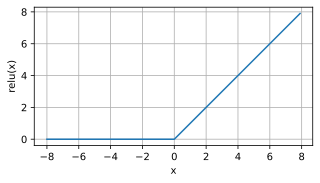

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), xlabel='x', ylabel='relu(x)', figsize=(5, 2.5))

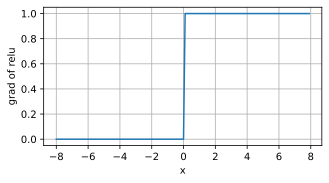

In [3]:
# 输入精确等于0时不可导，也认为导数为0
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

ReLU的变体，包括**参数化ReLU（Parameterized ReLU, pReLU）** 函数。添加一个线性项，即使参数为负时某些信息仍然可以通过
$$\text{pRelu}(x)=\text{max}(0,x)+\alpha \text{min}(0,x)$$

#### sigmoid函数
* 将定义域在$\mathbb{R}$中的输入变换为区间(0,1)上的输出。因此通常称为**挤压函数（squashing function）**：将范围(-inf,inf)中的任意输入压缩到区间(0,1)中的某个值：
  $$\text{sigmoid}(x)=\frac{1}{1+\text{exp}(-x)}$$
* 特点
  * 平滑、可微的阈值单元近似
  * 将输出视作**二元分类**问题的概率时，sigmoid被广泛用作输出单元上的激活函数（可以视为softmax的特例）
  * 在隐藏层中较少使用，大部分时候被更简单、更容易训练的ReLU取代

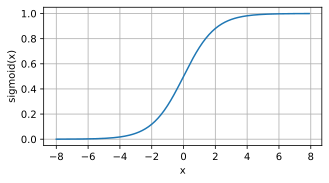

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{sigmoid}(x)=\frac{\text{exp}(-x)}{(1+\text{exp}(-x))^2}=\text{sigmoid}(x)(1-\text{sigmoid}(x))$$

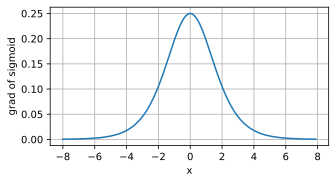

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### tanh函数
* 双曲正切，类sigmoid，将输入压缩转换到区间(-1,1)上
  $$\text{tanh}(x)=\frac{1-\text{exp}(-2x)}{1+\text{exp}(-2x)}$$

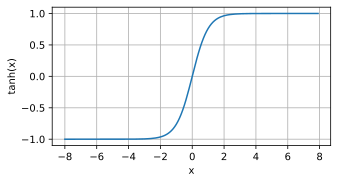

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

导数
$$\frac{d}{dx}\text{tanh}(x)=1-\text{tanh}^2(x)$$

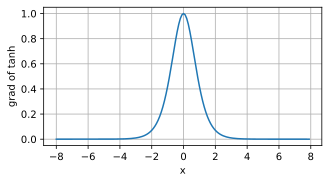

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 4.2 多层感知机的从零开始实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数
* 超参数隐藏单元个数， 选择2的若干次幂，在计算上更高效

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256 # 256个隐藏单元

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3 模型

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # "@"代表矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

In [14]:
# Copied from ch03

from IPython import display

def accuracy(y_hat, y): #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # [False, True]
    return float(cmp.type(y.dtype).sum()) # [False, True] -> [0, 1]再求和

def evaluate_accuracy(net, data_iter): #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

class Accumulator: #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def train_epoch_ch3(net, train_iter, loss, updater): #@save
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()

    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator: #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): #@save
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

def predict_ch3(net, test_iter, n=6): #@save
    """预测标签"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

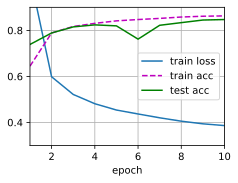

In [15]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

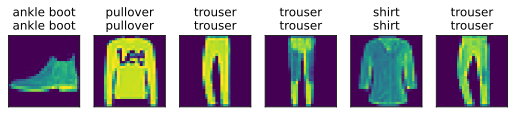

In [16]:
# 预测
predict_ch3(net, test_iter)

![fashion-mnist-4.2.5.png](./images/fashion-mnist-4.2.5.png)

## 4.3 多层感知机的简洁实现

In [17]:
import torch
from torch import nn
from d2l import torch as d2l

### 4.3.1 模型

In [18]:
net = nn.Sequential(nn.Flatten(), # 展平层
                    nn.Linear(784, 256), # 隐藏层
                    nn.ReLU(), # 隐藏层激活函数
                   nn.Linear(256, 10)) # 输出层

# 初始化模型参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.1)

net.apply(init_weights);

In [19]:
# 损失函数 & 优化算法
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

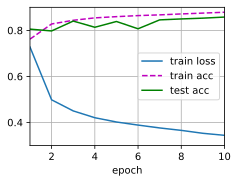

In [20]:
# 训练
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4 模型选择、欠拟合和过拟合
* 机器学习的根本问题：如何**发现可以泛化的模式**
* 过拟合（overfitting）：将模型在训练数据上拟合的比在潜在分布中更接近的现象

### 4.4.1 训练误差和泛化误差
* 训练误差（training error）：模型在训练数据集上计算得到的误差
* 泛化误差（generalization error）：模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的**期望**

#### 统计学习理论
* 独立同分布假设（i.i.d assumption）：假设训练数据和测试数据都是从相同的分布中独立提取的

#### 模型复杂性
* 模型，数据和误差
  * 简单模型+大量数据->泛化误差与训练误差相近
  * 更复杂的模型+更少的数据->训练误差会下降，泛化误差会增大
* 几个倾向于影响模型泛化的因素
  * 可调整参数的数量
    * 当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合
  * 参数采用的值
    * 当权重的取值范围较大时，模型可能更容易过拟合
  * 训练样本的数量
    * 训练样本数量越大，过拟合需要的模型就越复杂

### 4.4.2 模型选择
* 定义
  * 在评估几个候选模型后选择最终的模型
* 场景
  * 有时需要进行比较的模型本质上完全不同，例如决策树和线性模型
  * 有时需要比较不同的超参数设置下的同一类模型
    
#### 验证集
* 为什么需要验证集
  * 原则上，在确定所有的超参数之前，不希望用到测试集。否则可能会有过拟合测试数据的风险，无法再使用测试数据评估模型
  * 也不能仅仅依靠训练数据来选择模型，这样无法评估训练数据的泛化误差
* 三份数据
  * 训练数据集
  * 验证数据集
  * 测试数据集
* 现实是验证数据和测试数据之间的边界模糊。本书中使用数据集应该被正确地称为训练数据和验证数据的数据集，并没有真正的测试数据集

#### K折交叉验证
* 问题
  * 当训练数据稀缺时，甚至可能无法提供足够的数据来构成一个合适的验证集
* 流行解法
  * K折交叉验证。将原始数据分成K个不重合子集。执行K次模型训练和验证，每次在K-1个子集上进行训练，并在剩余的一个子集上进行验证。最后通过对K次实验的结果取平均来估计训练和验证误差

### 4.4.3 欠拟合还是过拟合
* 训练误差和验证误差都很严重，但它们之间仅有一点差距。如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），无法捕获试图学习的模式，即**欠拟合（underfitting）**。由于训练误差和验证误差之间的泛化误差很小，有理由相信可以用一个更复杂的模型降低训练误差
* 训练误差明显低于验证误差表明严重的**过拟合（overfitting）**

#### 模型复杂性

![4.4.1](./images/4.4.1.png)

#### 数据集大小
* 训练数据集中的样本越少，越有可能过拟合
* 一般来说，更多的数据不会有什么坏处
* 对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系
  * 给出更多的数据，可能拟合一个更复杂的模型
  * 如果没有足够的数据，简单的模型可能更有用

### 4.4.4 多项式回归

In [21]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#### 生成数据集
给定$x$，使用以下三阶多项式来生成训练和测试数据的标签：
$$y=5+1.2x-3.4\frac{x^2}{2!}+5.6\frac{x^3}{3!}+\epsilon$$
其中$\epsilon \in \mathcal{N}(0,0.1^2)$，使用$\frac{x^i}{i!}$的目的是避免非常大的梯度值或损失值

In [22]:
max_degree = 20 # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # gamma(n)=(n-1)!
# labels的维度：(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [23]:
# Numpy ndarray转换为tensor
import warnings
warnings.filterwarnings('ignore')
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [24]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.0895],
         [-2.2111]]),
 tensor([[ 1.0000e+00,  8.9456e-02,  4.0012e-03,  1.1931e-04,  2.6683e-06,
           4.7739e-08,  7.1175e-10,  9.0958e-12,  1.0171e-13,  1.0110e-15,
           9.0436e-18,  7.3546e-20,  5.4826e-22,  3.7727e-24,  2.4107e-26,
           1.4377e-28,  8.0380e-31,  4.2297e-33,  2.1021e-35,  9.8970e-38],
         [ 1.0000e+00, -2.2111e+00,  2.4444e+00, -1.8016e+00,  9.9587e-01,
          -4.4039e-01,  1.6229e-01, -5.1262e-02,  1.4168e-02, -3.4807e-03,
           7.6962e-04, -1.5470e-04,  2.8504e-05, -4.8481e-06,  7.6567e-07,
          -1.1286e-07,  1.5597e-08, -2.0286e-09,  2.4919e-10, -2.8999e-11]]),
 tensor([  5.1146, -16.0029]))

#### 对模型进行训练和测试

In [25]:
def evaluate_loss(net, data_iter, loss): #@save
    """评估给定数据集上模型的损失"""
    metric = Accumulator(2) # 损失的总和，样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [26]:
# 训练函数
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为已经在多项式中实现
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)), batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1, num_epochs], ylim=[1e-3, 1e2], legend=['train', 'test'])
    for epoch in range(num_epochs):
        train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

#### 三阶多项式函数拟合（正常）

weight: [[ 5.0067058  1.2217575 -3.378765   5.5644727]]


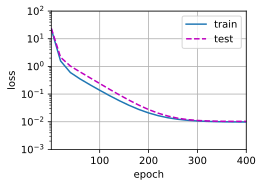

In [27]:
# 从多项式特征中选择前4个维度，即1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

#### 线性函数拟合（欠拟合）

weight: [[3.9319513 3.6703568]]


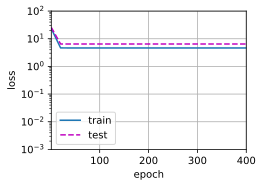

In [28]:
# 从多项式特征中选择前2个维度，即1, x
train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

#### 高阶多项式函数拟合（过拟合）

weight: [[ 5.0064926   1.2753431  -3.3411849   5.1477165  -0.27823928  1.4414527
   0.31466097  0.2888992  -0.16206549 -0.14439139  0.12394869 -0.10170942
  -0.08285976  0.04074974 -0.02829744  0.07687201  0.09624352  0.21436232
  -0.09322608 -0.13979053]]


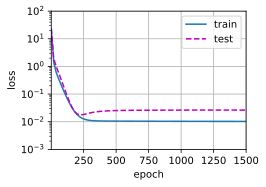

In [29]:
# 从多项式特征中选择所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.5 权重衰减
* **正则化**模型的技术，缓解过拟合问题
* 可以通过收集更多的训练数据来缓解过拟合，但这样成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。假设已经有了尽可能多的高质量数据，便可以将重点放在正则化技术上
* 上节通过调整拟合多项式的阶数来限制模型的容量，**限制特征的数量**是缓解过拟合的一种常用技术，但是太简单，在多变量的情况下阶数上微小的变化也会显著增加模型的复杂性

#### 范数与权重衰减
* **权重衰减（weight decay）** 是最广泛使用的正则化技术之一，通常被称为$L_2$正则化
* **通过函数与零的距离来衡量函数的复杂度**
* 如何衡量？一种简单的方法是**通过线性函数$f(\textbf{x})=\textbf{w}^{\text{T}}\textbf{x}$中权重向量的某个范数来度量其复杂性**，例如$||\textbf{w}||^2$
* 要保证权重向量比较小，最常用的方法是将其范数作为**惩罚**加到最小化损失的问题中，将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚之和
* 此时，如果权重向量增长的太大，学习算法可能会更集中于最小化权重范数$||\textbf{w}||^2$
* 线性回归损失：$L(\textbf{w},b) = \frac{1}{n}\sum\limits_{i=1}^{n}\frac{1}{2}({\textbf{w}}^\text{T}{\textbf{x}}^{(i)}+b-y^{(i)})^2$
* 加入额外惩罚的损失：$L(\textbf{w},b)+\frac{\lambda}{2}||\textbf{w}||^2$
  * 对于$\lambda=0$，恢复了原来的损失
  * 对于$\lambda>0$，限制$||\textbf{w}||^2$大小，越大则对$\textbf{w}$的约束越大
* 为什么使用平方范数而不是标准范数（欧几里得距离）？
  * 为了便于计算
* 为什么不使用$L_1$范数？
  * 使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚，使得学习算法偏向于在大量特征上均匀分布权重的模型，实践中可能使得它们对单个变量中的观测误差更为稳定
  * 相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，而将其他权重清除为零。这称为**特征选择（feature selection）**，这可能是其他场景下需要的
* $L_2$正则化线性模型构成经典的**岭回归（ridge regression）** 算法；$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为**套索回归（lasso regression）**
* $L_2$正则化回归的小批量随机梯度下降更新：
  $$\textbf{w}\leftarrow(1-\eta\lambda)\textbf{w}-\frac{\eta}{|B|}\sum\limits_{i\in{B}}{\textbf{x}}^{(i)}({\textbf{w}}^\text{T}{\textbf{x}}^{(i)}+b-y^{(i)})$$
  * 根据估计值与观测值之间的差异更新$\textbf{w}$的同时，也试图将$\textbf{w}$的大小缩小到零。所以这种方法有时也被称为**权重衰减**
* 是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，在神经网络的不同层中也会有所不同。通常，网络输出层的偏置项不会被正则化

### 4.5.1 高维线性回归
* 通过一个例子演示权重衰减

In [30]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

通过以下公式生成数据：
$$y=0.05+\sum_{i=1}^d0.01x_i+\epsilon$$
其中$\epsilon\in\mathcal{N}(0,0.01^2)$

In [31]:
# 为了使拟合的效果更加明显，将维数增加到d=200，并使用一个只包含20个样本的小训练集
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.2 从零开始实现

#### 初始化模型参数

In [32]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 定义$L_2$范数惩罚

In [33]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 定义训练代码实现

In [34]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

#### 忽略正则化直接训练
* 严重的过拟合

w的L2范数是： 13.381759643554688


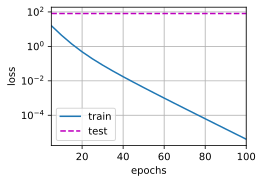

In [35]:
train(lambd=0)

#### 使用权重衰减
* 过拟合缓解

w的L2范数是： 0.34177690744400024


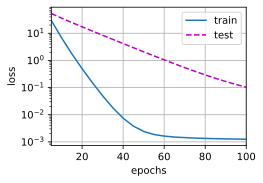

In [36]:
train(lambd=3)

### 4.5.3 简洁实现

In [37]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params": net[0].weight, 'weight_decay': wd},
        {"params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'loss'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.698749542236328


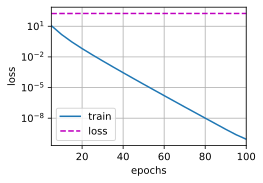

In [38]:
train_concise(0)

w的L2范数： 0.3795563578605652


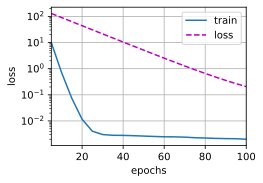

In [39]:
train_concise(3)

## 4.6 暂退法（Dropout）
* 权重衰减的合理性
  * 我们希望模型深度挖掘特征，即将权重分散到许多特征中，而不是过于依赖少数潜在的虚假关联

### 4.6.1 重新审视过拟合
* 线性模型
  * 当面对更多的特征而样本不足时，线性模型往往会过拟合
  * 当给出更多的样本而不是特征，通常线性模型不会过拟合
* 线性模型泛化的可靠性是有代价的
  * 线性模型没有考虑特征之间的交互作用
* **偏差-方差权衡（bias-variance tradeoff）**
  * 泛化性和灵活性之间的基本权衡
  * 线性模型有很高的偏差：它们只能表示一小类函数。这些模型的方差很低：它们在不同的随机数据样本上可以得到相似的结果
  * 深度神经网络位于偏差-方差谱的另一端。神经网络并不局限于单独查看每个特征，而是学习特征之间的交互
* 即使有比特征多得多的样本，深度神经网络也有可能过拟合
* 深度神经网络的泛化性质令人费解，而这种泛化性质的数学基础仍然是悬而未决的研究问题

### 4.6.2 扰动的稳健性
* 什么是好的模型？
  * 能在未知的数据上有很好的表现：经典泛化理论认为，为了缩小训练和测试性能之间的差距，应该以**简单**的模型为目标
  * 简单性的另一个角度是**平滑性**，即函数不应该对其输入的微小变化敏感
* **暂退法**
  * 在训练过程中，建议在计算后续层之前向之前向网络的每一层**注入噪声**（即在前向传播过程中，计算每一内部层的同时注入噪声）。因为当训练一个有多层的深层网络时，注入噪声只会在输入-输出映射上增强平滑性
  * 为什么叫暂退法？
    * 从表面上看是在训练过程中丢弃（dropout）一些神经元
* 如何注入噪声？
  * 一种想法是以一种**无偏向（unbiased）的方式**注入噪声。这样在固定住其他层时，每一层的期望等于没有噪音时的值。将$\epsilon\in\mathcal{N}(0,\sigma^2)$采样噪声添加到输入$\textbf{x}$，从而产生扰动点$\textbf{x}'=\textbf{x}+\epsilon$，预期是$E[\textbf{x}']=\textbf{x}$
  * 在标准暂退法正则化中，通过按保留（未丢弃）的节点的分数进行规范化来消除每一层的偏差。换言之，每个中间活性值$h$以暂退概率$p$由随机变量$h'$替换：
    $$h'=\begin{cases}
    0\,\,概率为p\\
    \frac{h}{1-p}\,\,其他情况
    \end{cases}$$
    根据此模型的设计，其期望值保持不变，即$E[h']=h$

### 4.6.3 实践中的暂退法
* 将暂退法应用到隐藏层，以$p$的概率将隐藏层单元置为零时，结果可以看作一个只包含原始神经元子集的网络
  ![4.6.1](./images/4.6.1.png)
* 通常在测试时不用暂退法。例外：一些研究人员在测试时使用暂退法，用于估计神经网络预测的“不确定性”：如果通过许多不同的暂退法遮盖后得到的预测结果都是一致的，那么可以说网络发挥更稳定

### 4.6.4 从零开始实现
* 实现单层的暂退法函数
  * 从均匀分布$U[0,1]$中抽取样本，样本数与这层神经网络的维度一致。然后保留那些对应样本大于$p$的节点，把剩下的丢弃

In [40]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout) # 缩放剩余部分

In [41]:
X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  0.,  8., 10., 12., 14.],
        [16.,  0.,  0., 22.,  0.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


#### 定义模型参数

In [42]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

#### 定义模型
* 将暂退法应用于每个隐藏层的输出（在激活函数之后）
* 为每一层分别设置暂退概率：常见的技巧是在靠近输入层的地方设置较低的暂退概率

In [43]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

#### 训练和测试

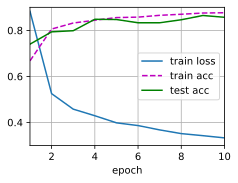

In [44]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.6.5 简洁实现

In [45]:
net = nn.Sequential(nn.Flatten(),
                   nn.Linear(784, 256),
                   nn.ReLU(),
                   # 在第一个全连接层之后添加一个dropout层
                   nn.Dropout(dropout1),
                   nn.Linear(256, 256),
                   nn.ReLU(),
                   # 在第二个全连接层之后添加一个dropout层
                   nn.Dropout(dropout2),
                   nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

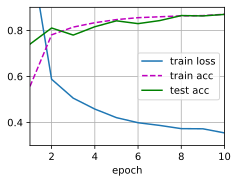

In [46]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.7 前向传播、反向传播和计算图

### 4.7.1 前向传播
* 定义
  * forward propagation/forward pass
  * 按顺序（从输入层到输出层）计算和存储神经网络中每层的结果
* 以带权重衰减（$L_2$正则化）的单隐藏层神经网络为例
  * 输入样本是$\textbf{x}\in\mathbb{R}^d$，且隐藏层不包括偏置项，所以中间变量是：
    $$\textbf{z}=\textbf{W}^{(1)}\textbf{x}$$
    其中$\textbf{W}^{(1)}\in\mathbb{R}^{h \times d}$是隐藏层的权重参数
  * 将中间变量$\textbf{z}\in\mathbb{R}^h$通过激活函数$\phi$后得到长度为$h$的隐藏激活向量：
    $$\textbf{h}=\phi(\textbf{z})$$
  * 隐藏变量$\textbf{h}$也是一个中间变量，假设输出层的参数只有权重$\textbf{W}^{(2)}\in\mathbb{R}^{q \times h}$，得到输出层变量（长度为$q$的向量）：
    $$\textbf{o}=\textbf{W}^{(2)}\textbf{h}$$
  * 假设损失函数为$l$，样本标签为$y$，单个数据样本的损失项：
    $$L=l(\textbf{o},y)$$
  * 根据$L_2$正则化的定义，给定超参数$\lambda$，正则化项为：
    $$s=\frac{\lambda}{2}(||\textbf{W}^{(1)}||_F^2+||\textbf{W}^{(2)}||_F^2)$$
    其中矩阵的Frobenius范数是将矩阵展平为向量后应用的$L_2$范数
  * 最后，模型在给定数据样本上的正则化损失为：
    $$J=L+s$$
  * 在下文中，将$J$称为目标函数

### 4.7.2 前向传播计算图
* 正方形表示变量
* 圆圈表示操作符
![4.7.1](./images/4.7.1.png)

### 4.7.3 反向传播
* 定义
  * backward propagation/backpropagation
  * 计算神经网络参数梯度的方法
  * 根据微积分中的链式法则，按相反顺序从输出层到输入层遍历网络。该算法存储了计算某些参数梯度时所需的任何中间变量（偏导数）
  * 假设有函数$\text{Y}=f(\text{X})$和$\text{Z}=g(\text{Y})$，其中输入和输出X, Y, Z是任意形状的张量。利用链式法则，计算Z关于X的导数：
    $$\frac{\partial{\text{Z}}}{\partial{\text{X}}}=\text{prod}(\frac{\partial{\text{Z}}}{\partial{\text{Y}}},\frac{\partial{\text{Y}}}{\partial{\text{X}}})$$
    **prod运算**符在执行必要的操作（如换位和交换输入位置）后将其参数相乘。对于向量，只是矩阵-矩阵乘法。对于高阶张量，使用适当的对应项
* 上图中的单隐藏层简单网络的参数是$\textbf{W}^{(1)}$和$\textbf{W}^{(2)}$，反向传播的目的是计算梯度$\partial{J}/\partial{\textbf{W}^{(1)}}$和$\partial{J}/\partial{\textbf{W}^{(2)}}$，反向传播过程：
  1. 计算目标函数$J=L+s$相对于损失项$L$和正则项$s$的梯度
    $$\frac{\partial{J}}{\partial{L}}=1$$
    $$\frac{\partial{J}}{\partial{s}}=1$$
  2. 根据链式法则计算目标函数关于输出层变量$\textbf{o}$的梯度
    $$\frac{\partial{J}}{\partial{\textbf{o}}}=\text{prod}(\frac{\partial{J}}{\partial{L}},\frac{\partial{L}}{\partial{\textbf{o}}})=\frac{\partial{L}}{\partial{\textbf{o}}}\in\mathbb{R}^q$$
  3. 计算正则化项相对于两个参数的梯度
    $$\frac{\partial{s}}{\partial{\textbf{W}^{(1)}}}=\lambda\textbf{W}^{(1)}$$
    $$\frac{\partial{s}}{\partial{\textbf{W}^{(2)}}}=\lambda\textbf{W}^{(2)}$$
  4. 计算最接近输出层的模型参数的梯度$\partial{J}/\partial{\textbf{W}^{(2)}}\in\mathbb{R}^{q \times h}$。由链式法则得出：
    $$\frac{\partial{J}}{\partial{\textbf{W}^{(2)}}}=\text{prod}(\frac{\partial{J}}{\partial{\textbf{o}}},\frac{\partial{\textbf{o}}}{\partial{\textbf{W}^{(2)}}})+\text{prod}(\frac{\partial{J}}{\partial{s}},\frac{\partial{s}}{\partial{\textbf{W}^{(2)}}})=\frac{\partial{J}}{\partial{\textbf{o}}}\textbf{h}^{\text{T}}+\lambda\textbf{W}^{(2)}$$
  5. 继续沿着输出层到隐藏层反向传播，关于隐藏层输出的梯度$\partial{J}/\partial{\textbf{h}}\in\mathbb{R}^{h}$由下式给出：
     $$\frac{\partial{J}}{\partial{\textbf{h}}}=\text{prod}(\frac{\partial{J}}{\partial{\textbf{o}}},\frac{\partial{\textbf{o}}}{\partial{\textbf{h}}})={\textbf{W}^{(2)}}^{\text{T}}\frac{\partial{J}}{\partial{\textbf{o}}}$$
  6. 由于激活函数$\phi$是**按元素**计算的，计算中间变量$\textbf{z}$的梯度$\partial{J}/\partial{\textbf{z}}\in\mathbb{R}^{h}$需要使用按元素乘法运算符，用$\odot$表示：
     $$\frac{\partial{J}}{\partial{\textbf{z}}}=\text{prod}(\frac{\partial{J}}{\partial{\textbf{h}}},\frac{\partial{\textbf{h}}}{\partial{\textbf{z}}})=\frac{\partial{J}}{\partial{\textbf{h}}}\odot\phi'(\textbf{z})$$
  7. 得到最接近输入出的模型参数梯度$\partial{J}/\partial{\textbf{W}^{(1)}}\in\mathbb{R}^{h \times d}$。根据链式法则，得到：
     $$\frac{\partial{J}}{\partial{\textbf{W}^{(1)}}}=\text{prod}(\frac{\partial{J}}{\partial{\textbf{z}}},\frac{\partial{\textbf{z}}}{\partial{\textbf{W}^{(1)}}})+\text{prod}(\frac{\partial{J}}{\partial{s}},\frac{\partial{s}}{\partial{\textbf{W}^{(1)}}})=\frac{\partial{J}}{\partial{\textbf{z}}}\textbf{x}^{\text{T}}+\lambda\textbf{W}^{(1)}$$

### 4.7.4 训练神经网络
* 在训练神经网络时，**前向传播和反向传播相互依赖**。对于前向传播，沿着依赖的方向遍历计算图并计算其路径上的所有变量。然后将这些用于反向传播，其中计算顺序与计算图的相反
* 在训练神经网络时，在初始化模型参数后，交替使用前向传播和反向传播，利用反向传播给出的梯度更新模型参数。反向传播重复利用前向传播中存储的中间值，以避免重复计算。带来的影响之一是需要保留中间值，直到反向传播完成。这也是训练比单纯的预测需要更多的内存（显卡）的原因之一

## 4.8 数值稳定性和模型初始化
* 初始化方案的选择在神经网络学习中起着举足轻重的作用，它对保持数值稳定性至关重要
* 选择哪个非线性激活函数以及如何初始化参数可以决定优化算法收敛的速度有多快。糟糕的选择可能会导致在训练时遇到梯度爆炸或梯度消失

### 4.8.1 梯度消失和梯度爆炸
* 实例
  
  考虑一个具有$L$层、输入$\textbf{x}$和输出$\textbf{o}$的深层网络。每一层$l$由变换$f_l$定义，该变换的参数为权重$\textbf{W}^{(l)}$，其隐藏变量是$\textbf{h}^{(l)}$（令$\textbf{h}^{(0)}=\textbf{x}$）。网络可以表示为：
  $$\textbf{h}^{(l)}=f_l(\textbf{h}^{(l-1)})$$
  因此：
  $$\textbf{o}=f_L\circ...\circ f_1(\textbf{x})$$
  如果所有隐藏变量和输入都是向量，可以将$\textbf{o}$关于任何一组参数$\textbf{W}^{(l)}$的梯度写为下式：
  $$\partial_{\textbf{W}^{(l)}}\textbf{o}=\underbrace{\partial_{\textbf{h}^{(L-1)}}\textbf{h}^{(L)}}_{\textbf{M}^{(L)\underline{\underline{\text{def}}}}}\cdot...\cdot\underbrace{\partial_{\textbf{h}^{(l)}}\textbf{h}^{(l+1)}}_{\textbf{M}^{(l+1)}\underline{\underline{\text{def}}}}\underbrace{\partial_{\textbf{W}^{(l)}}\textbf{h}^{(l)}}_{\textbf{v}^{(l)\underline{\underline{\text{def}}}}}$$
  该梯度是一个$L-l$个矩阵$\textbf{M}^{(L)}\cdot...\cdot\textbf{M}^{(l+1)}$与梯度向量$\textbf{v}^{(l)}$的乘积。因此，容易受到数值下溢的影响（当太多概率乘在一起时经常出现）。处理概率的一个常见技巧是切换到对数空间，但这可能导致问题更严重：最初，矩阵$\textbf{M}^{(l)}$可能具有各种各样的特征值，它们的乘积可能非常大，也可能非常小
  
* 不稳定梯度带来的风险 - 威胁优化算法的稳定性
  * **梯度爆炸（gradient exploding）**
    参数更新过大，破坏了模型的稳定收敛
  * **梯度消失（gradient vanishing）**
    参数更新过小，在每次更新时几乎不会移动，导致模型无法学习

#### 梯度消失
sigmoid函数是导致梯度消失问题的一个常见原因。输入很大或很小时，它的梯度都会消失

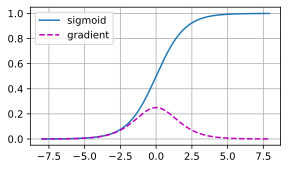

In [47]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()], legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

#### 梯度爆炸
生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。对于我们选择的尺度（方差$\sigma^2=1$），矩阵乘积发生爆炸

In [48]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n', M)
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[-1.3577,  0.4284,  1.0884, -0.0208],
        [ 0.2082,  0.8725,  1.4231,  1.1386],
        [ 0.4519,  0.5527, -0.4842,  1.4420],
        [-0.4164, -0.8276, -0.3346, -1.3670]])
乘以100个矩阵后
 tensor([[ 7.3160e+27, -6.5912e+27, -1.8961e+27, -5.6693e+27],
        [-2.9288e+27,  2.6386e+27,  7.5904e+26,  2.2696e+27],
        [-3.7355e+27,  3.3654e+27,  9.6811e+26,  2.8947e+27],
        [ 3.9204e+27, -3.5321e+27, -1.0161e+27, -3.0381e+27]])


#### 打破对称性
神经网络设计中的另一个问题是其参数化所固有的**对称性**。假设有一个多层感知机，它有一个隐藏层和两个隐藏单元。在这种情况下，可以对第一层的权重$\textbf{W}^{(1)}$进行重排列，并且同样对输出层的权重进行重排列，可以获得相同的函数。第一个隐藏单元与第二个隐藏单元没有什么特别的区别。换句话说，我们在每一层的隐藏单元之间具有**排列对称性**。

对称性使得无法实现网络的表达能力。

小批量随机梯度下降不会打破对称性，但暂退法正则化可以。

### 4.8.2 参数初始化
* 解决（或至少减轻）上述问题的一种方法是进行参数初始化，优化期间的注意和适当的正则化也可以进一步提高稳定性

#### 默认初始化
* 前面使用**正态分布**来初始化权重值。如果不指定初始化方法，框架将使用默认的随机初始化方法。对于中等难度的问题，这种方法通常很有效

#### Xavier初始化
* 效果
  * 对于每一层，输出的方差不受输入数量的影响，任何梯度的方差不受输出数量的影响
* 实现
  * 从**均值为零，方差$\sigma^2=\frac{2}{n_{\text{in}}+n_{\text{out}}}$的高斯分布** 中采样权重。也可以将其改为选择从**均匀分布**中抽取权重时的方差。注意均匀分布$U(-a,a)$的方差为$\frac{a^2}{3}$。将$\frac{a^2}{3}$代入到$\sigma^2$的条件中，得到初始化值域：
  $$U(-\sqrt{\frac{6}{n_\text{in}+n_\text{out}}},\sqrt{\frac{6}{n_\text{in}+n_\text{out}}})$$
* 为什么这样实现
  * 考虑没有非线性的全连接层输出（例如，隐藏变量）$o_i$的尺度分布，对于该层$n_{\text{in}}$输入$x_j$及其相关权重$w_{ij}$，输出由下式给出
    $$o_i=\sum_{j=1}^{n_{\text{in}}}w_{ij}x_j$$
    权重$w_{ij}$都是从同一分布中独立抽取的。此外，假设该分布具有零均值和方差$\sigma^2$（不一定是高斯分布）。假设层$x_j$的输入也具有零均值和方差$\gamma^2$，并且它们独立于$w_{ij}$并且彼此独立。在这种情况下，按如下方式计算$o_j$的平均值和方差：
    $$E[o_i]=\sum_{j=1}^{n_{\text{in}}}E[w_{ij}x_j]=\sum_{j=1}^{n_{\text{in}}}E[w_{ij}]E[x_j]=0$$
    $$\text{Var}[o_i]=E[o_i^2]-(E[o_i])^2=\sum_{j=1}^{n_{\text{in}}}E[w_{ij}^2x_j^2]-0=\sum_{j=1}^{n_{\text{in}}}E[w_{ij}^2]E[x_j^2]=n_{\text{in}}\sigma^2\gamma^2$$
    保持方差不变的一种方法是设置$n_{\text{in}}\sigma^2=1$。考虑反向传播过程，使用与前向传播相同的判断，除非$n_\text{out}\sigma^2=1$（$n_\text{out}$为该层的输出的数量），否则梯度的方差可能会增大。不可能同时满足这两个条件，相反，只需满足：
    $$\frac{1}{2}(n_\text{in}+n_\text{out})\sigma^2=1$$
    即
    $$\sigma=\sqrt{\frac{2}{n_\text{in}+n_\text{out}}}$$

## 4.9 环境和分布偏移